In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Arc
import seaborn as sns

from statsbombpy import sb

from mplsoccer import Pitch, VerticalPitch, FontManager

from scipy.ndimage import gaussian_filter

from matplotlib import rcParams
import cmasher as cmr

%matplotlib inline

In [3]:
#Dibujar campo, no usamos en mplsoccer

def draw_field(ax, heatmap=False ,field_colour= "#195905", line_colour= "#000000"):

    """
        Function to draw a football field with the dimensions from statsbomb docs (See page 22 opendata/docs/OpenDataEvents.pdataframe)
    
        Args:
            heatmap (Boolean) : Won't add background rectangles if heatmap = True
            field_colour (Color/Hex) : Colour for the field.
            line_colour (Color/Hex) : Colour of the lines on the field.
        
        Retuns:
            ax (axes): Matplotlib axes.
    """

    # Call these from the original place you want to create a pitch. Pass ax to the function.
    # fig, ax = plt.subplots()
    # fig.set_size_inches(10, 6.5)

    x_min = 0
    x_max = 120
    y_min = 0
    y_max = 80

    linewidth = 2

    # Outline of the Field.
    plt.plot([x_min, y_min], [x_min, y_max], color=line_colour, linewidth=linewidth)
    plt.plot([x_min, x_max], [y_max, y_max], color=line_colour, linewidth=linewidth)
    plt.plot([x_max, x_max], [y_max, y_min], color=line_colour, linewidth=linewidth)
    plt.plot([x_max, y_min], [x_min, y_min], color=line_colour, linewidth=linewidth)

    # Centre line.
    plt.plot([x_max/2, x_max/2], [x_min, y_max], color=line_colour, linewidth=linewidth)

    # Left penalty area.
    plt.plot([18, 18], [62, 18], color=line_colour, linewidth=linewidth)
    plt.plot([0, 18], [62, 62], color=line_colour, linewidth=linewidth)
    plt.plot([0, 18], [18, 18], color=line_colour, linewidth=linewidth)

    # Right Penalty Area
    plt.plot([120, 102], [62, 62], color=line_colour, linewidth=linewidth)
    plt.plot([120, 102], [18, 18], color=line_colour, linewidth=linewidth)
    plt.plot([102, 102], [18, 62], color=line_colour, linewidth=linewidth)

    # Left 6-yard Box
    plt.plot([6, 6], [30, 50], color=line_colour, linewidth=linewidth)
    plt.plot([0, 6], [50, 50], color=line_colour, linewidth=linewidth)
    plt.plot([0, 6], [30, 30], color=line_colour, linewidth=linewidth)

    # Right 6-yard Box
    plt.plot([120, 114], [30, 30], color=line_colour, linewidth=linewidth)
    plt.plot([114, 114], [50, 30], color=line_colour, linewidth=linewidth)
    plt.plot([120, 114], [50, 50], color=line_colour, linewidth=linewidth)  


    # Adding colour Rectangles in boxes
    rectangle_1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=field_colour, zorder=1,alpha=1)
    rectangle_2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=field_colour, zorder=1,alpha=1)

    # Adding colour Pitch rectangle
    rectangle_3 = plt.Rectangle((0, 0), 120, 80,ls='-',color=field_colour, zorder=1,alpha=1)

    # Prepare Circles
    centre_circle = plt.Circle((x_max/2, y_max/2), 10, color=line_colour, fill=False, linewidth=linewidth)
    centre_spot = plt.Circle((x_max/2, y_max/2), 0.9, color=line_colour, linewidth=linewidth)

    left_penalty_spot = plt.Circle((12, 40), 0.71, color=line_colour)
    right_penalty_spot = plt.Circle((108, 40), 0.71, color=line_colour)

    # Prepare Arcs
    left_arc = Arc((13, 40), height=16.2, width=16.2, angle=0, theta1=310, theta2=50, color=line_colour, linewidth=linewidth)
    right_arc = Arc((107, 40), height=16.2, width=16.2, angle=0, theta1=130, theta2=230, color=line_colour, linewidth=linewidth)


    # If we are drawing a pitch for a heatmap we DON'T want to add the 'background' rectangles.
    if not heatmap:
        ax.add_artist(rectangle_1)
        ax.add_artist(rectangle_2)
        ax.add_artist(rectangle_3)

    # Draw Circlesf
    ax.add_artist(centre_circle)
    ax.add_artist(centre_spot)
    ax.add_artist(left_penalty_spot)
    ax.add_artist(right_penalty_spot)

    # Draw Arcs
    ax.add_artist(left_arc)
    ax.add_artist(right_arc)

    plt.xlim([-5, 125])
    plt.ylim([-5, 85])

    plt.axis('off')

    # invert the axis so iut matches the sheet from statsbomb docs
    ax.invert_yaxis()

    return ax

In [4]:
#Crear mapa de calor de los eventos
def create_heatmap(x, y, s, bins=1000):
    """
        Function to return a 'Heatmap' Place this on top of a football field.
    """
    extent = [0, 120, 0, 80]
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[[0,120], [0,80]])
    heatmap = gaussian_filter(heatmap, sigma=s)

    
    return heatmap.T, extent

#Pintar el mapa
def plot_events_heatmap(df, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    ax.set_title(title, loc='left')
    img, extent = create_heatmap(120 - df['x'], 80-  df['y'], 40)
    ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    draw_field(ax, heatmap=True)

In [8]:
eventosA_T = sb.events(3775586)

eventosA_T['type'].unique()

credentials were not supplied. open data access only


array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Dribbled Past', 'Dribble', 'Clearance', 'Miscontrol',
       'Ball Recovery', 'Dispossessed', 'Duel', 'Shot', 'Block',
       'Goal Keeper', 'Foul Committed', 'Foul Won', 'Interception',
       '50/50', 'Shield', 'Substitution', 'Injury Stoppage', 'Half End',
       'Player Off', 'Player On', 'Tactical Shift', 'Referee Ball-Drop'],
      dtype=object)

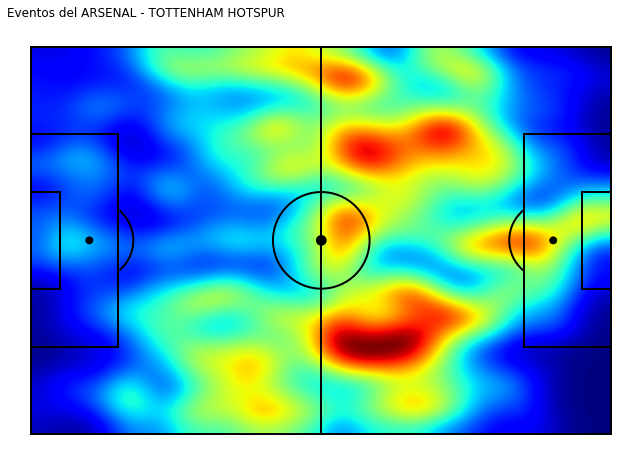

In [20]:
eventosA_T[['x', 'y']] = eventosA_T['location'].apply(pd.Series)

plot_events_heatmap(eventosA_T.loc[eventosA_T['type']=='Ball Receipt*'],'Eventos del ARSENAL - TOTTENHAM HOTSPUR')